### 1번

R, Python 등의 통계 프로그램을 사용하여 다음 문제를 풀어라

(a) 표준정규분포를 따르는 Z에 대하여 P(-2.1<Z<1.8)을 구하여라

In [18]:
pnorm(1.8) - pnorm(-2.1)

[1] 0.9462053

(b) 표준정규분포를 따르는 Z에 대하여 P(0<Z<k) = 0.45를 만족시키는 k값을 구하여라

In [17]:
qnorm(0.5+0.45)

[1] 1.644854

(c) 평균 μ=100, 표준편차 σ=15인 정규분포를 따르는 X에 대하여 P(91≤X≤127)을 구하여라

In [19]:
pnorm(127, 100, 15) - pnorm(91, 100, 15)

[1] 0.6898166

(d) 평균 μ=100, 표준편차 σ=15인 정규분포를 따르는 X에 대하여 P(X>k)=0.025를 만족시키는 k값을 구하여라

In [26]:
qnorm(0.025, 100, 15, lower.tail=FALSE)

[1] 129.3995

### 2번

건강한 사람에게 칼슘을 공급하면 혈압이 낮아지는지를 알아보기 위하여 비교실험을 하였다. 10명에게는 12주동안 칼슘을 공급하고, 11명에게는 칼슘을 공급하지 않은 뒤(심리적 효과를 없애기 위해 음식을 제공하는 사람과 먹는 사람은 칼슘이 들어있는지의 여부를 모르게 하였다) 혈압의 낮아지는 정도를 조사하였다.

|그룹|처리|실험대상수|평균|표준편차|
|:-:|:-:|:-:|:-:|:-:|
|1|칼슘을 공급한 그룹|10|5.000|8.743|
|2|칼슘을 공급하지 않은 그룹|11|-0.273|5.901|

(a) 공통분산을 가질 때의 t검정 방법을 이용하여 유의수준 α=0.05에서 검정을 하여라. 칼슘을 공급받은 그룹이 혈압이 낮아지는 정도가 더 큰가?

표본 크기가 작은 경우, 정규분포를 가정하고 분산이 동일하다고 가정할 때 다음과 같은 검정 통계량을 사용할 수 있다.

<img src="https://latex.codecogs.com/svg.image?H_0:\mu_1-\mu_2=\delta_0"><br><img src="https://latex.codecogs.com/svg.image?H_1:\mu_1-\mu_2>\delta_0">

<img src="https://latex.codecogs.com/svg.image?\frac{(\bar{X_1}-\bar{X_2})-\delta_0}{\sqrt{\frac{S_p^2}{n_1}&plus;\frac{S_p^2}{n_2}}}>t_{n_1+n_2-2,\alpha} \Rightarrow reject\;H_0">  <br>

<img src="https://latex.codecogs.com/svg.image?S_p^2=\frac{(n_1-1)S_1^2&plus;(n_2-1)S_2^2}{n_1&plus;n_2-2}">

In [45]:
# 기초 데이터
x1_bar = 5.0
x2_bar = -0.273
n1 = 10
n2 = 11
S1 = 8.743
S2 = 5.901

# 공통표준편차 Sp를 계산한다.
Sp = sqrt( ( (n1-1)*(S1^2) + (n2-1)*(S2^2) ) / (n1+n2-2) )
cat("공통분산 Sp:", Sp, "\n")

# 통계량 T를 구한다.
T_value = (x1_bar - x2_bar) / (Sp * sqrt((1/n1) + (1/n2)))
cat("통계량:", T_value, "\n")

# 자유도가 19이고, 유의수준이 0.05인 t분포 값을 구한다.
test_value = qt(0.05, n1+n2-2, lower.tail=FALSE)
cat("자유도: 19, 유의수준: 0.05인 t분포의 값:", test_value, "\n")

cat("통계량", T_value, "이 t-분포의 값", test_value, "보다 작기 때문에 귀무가설을 기각하지 않는다.\n")
cat("즉, 칼슘을 공급받은 그룹이 혈압이 낮아지는 정도가 더 크다고 볼 수 없다.")

공통분산 Sp: 7.38483 


통계량: 1.634195 
자유도: 19, 유의수준: 0.05인 t분포의 값: 1.729133 
통계량 1.634195 이 t-분포의 값 1.729133 보다 작기 때문에 귀무가설을 기각하지 않는다.
즉, 칼슘을 공급받은 그룹이 혈압이 낮아지는 정도가 더 크다고 볼 수 없다.

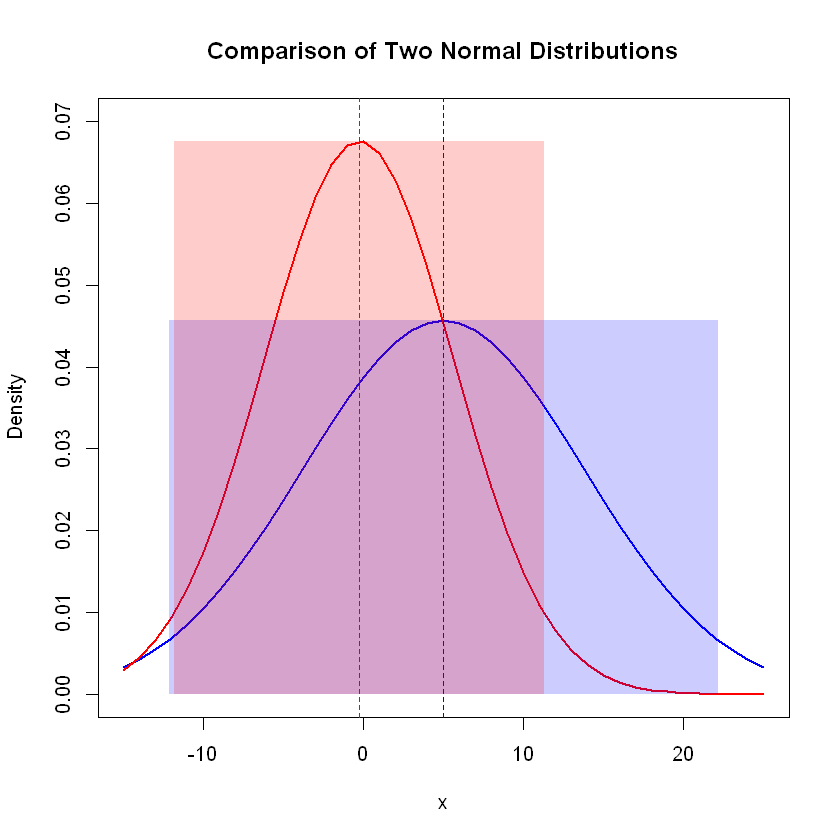

In [118]:
# 참고로 두 분포를 그래프로 그리고 95% 신뢰구간을 표시해보면 상당부분이 겹치는 것을 알 수 있다.

# 데이터 생성
group1 <- dnorm(seq(-15, 25), mean = 5.000, sd = 8.743)
group2 <- dnorm(seq(-15, 25), mean = -0.273, sd = 5.901)

# 그래프 그리기
plot(seq(-15, 25), group1, type = "l", col = "blue", lwd = 2, ylim = c(0,0.07), xlab = "x", ylab = "Density", main = "Comparison of Two Normal Distributions")
lines(seq(-15, 25), group2, type = "l", col = "red", lwd = 2)

# 세로줄 추가
abline(v = 5.000, col = "blue", lty = 2)
abline(v = -0.273, col = "red", lty = 2)

# 유의수준 0.05 범위
rect(5.000 - 1.96*8.743, 0, 5.000 + 1.96*8.743, max(group1), col = rgb(0, 0, 1, alpha = 0.2), border = NA)  # Group 1
rect(-0.273 - 1.96*5.901, 0, -0.273 + 1.96*5.901, max(group2), col = rgb(1, 0, 0, alpha = 0.2), border = NA)  # Group 2

(b) 이표본 t검정방법을 이용하여 유의수준 α=0.05에서 검정을 하여라.

In [41]:
# R code
x1_bar = 5.0
x2_bar = -0.273
n1 = 10
n2 = 11
S1 = 8.743
S2 = 5.901

# 이표본 t검정방법을 이용하려면 검정통계량 T값과 새터스웨이트 방법을 사용한 자유도를 각각 다음 공식으로 구해야 한다.

# 검정통계량 T 값을 구한다.
T_value = (x1_bar-x2_bar) / sqrt( (S1^2)/n1 + (S2^2)/n2  )
cat("통계량:", T_value, "\n")

# 새터스웨이트 방법으로 자유도를 계산한다.
pi = (S1^2/n1 + S2^2/n2)^2 / (((S1^2/n1)^2)/(n1-1)+ ((S2^2/n2)^2)/(n2-1))
cat("새터스웨이트 자유도 Φ:", pi, "\n")

# 자유도가 Φ이고, 유의수준이 0.05인 t분포 값을 구한다.
test_value = qt(0.05, pi, lower.tail=FALSE)
cat("자유도가", pi, "이고 유의수준이 0.05인 t분포의 값:", test_value, "\n")

cat("통계량", T_value, "이 t-분포의 값", test_value, "보다 작기 때문에 귀무가설을 기각하지 않는다.\n")
cat("즉, 칼슘을 공급받은 그룹이 혈압이 낮아지는 정도가 더 크다고 볼 수 없다.")


통계량: 1.603808 
새터스웨이트 자유도 Φ: 15.59131 
자유도가 15.59131 이고 유의수준이 0.05인 t값: 1.729133 
통계량 1.603808 이 t-분포의 값 1.748695 보다 작기 때문에 귀무가설을 기각하지 않는다.
즉, 칼슘을 공급받은 그룹이 혈압이 낮아지는 정도가 더 크다고 볼 수 없다.

(c) 두 그룹의 표준편차가 같은지를 검정하고 싶다. 가설을 세우고 유의수준 α=0.05에서 검정을 하여라.

표본의 분산비를 나타내는 통계량 F가 자유도가 각각 n1-1, n2-2인 F분포를 따르는 사실을 이용하여 모분산비에 대한 가설검정을 할 수 있다.

In [50]:
# R code
n1 = 10
n2 = 11
S1 = 8.743
S2 = 5.901

# 검정통계량 F 값을 구한다.
F_value = (S1^2 / S2^2)
cat("검정통계량 F:", F_value, "\n")

# 자유도가 n1-1, n2-1이고, 유의수준이 0.05인 F분포 값을 구한다.
test_value = qf(0.05, n1-1, n2-1, lower.tail=FALSE)
cat("자유도가", n1-1, n2-1, "이고 유의수준이 0.05인 F분포의 값:", test_value, "\n")

cat("통계량", F_value, "이 F분포의 값", test_value, "보다 작기 때문에 귀무가설을 기각하지 않는다.\n")
cat("즉, 두 그룹의 표준편차는 같다고 볼 수 있다.")

검정통계량 F: 2.195178 


자유도가 9 10 이고 유의수준이 0.05인 F분포의 값: 3.020383 
통계량 2.195178 이 F분포의 값 3.020383 보다 작기 때문에 귀무가설을 기각하지 않는다.
즉, 두 그룹의 표준편차는 같다고 볼 수 있다.

### 4번

어떤 상점에서 고객이 구입하는 상품의 금액과 카운터에서 값을 치르는데 걸리는 시간 사이에 회귀함수 관계가 있는가를 알아보기 위하여 10명의 고객을 임의로 추출 다음의 data를 얻었다.

구매상품 가격 x=(6.4, 16.1, 42.1, 2.1, 30.7, 32.1, 7.2, 3.4, 20.8, 1.5)
소요되는 시간 y=(1.7, 2.7, 4.9, 0.3, 3.9, 4.1, 1.2, 0.5, 3.3, 0.2)

(a) data의 산점도를 그려라

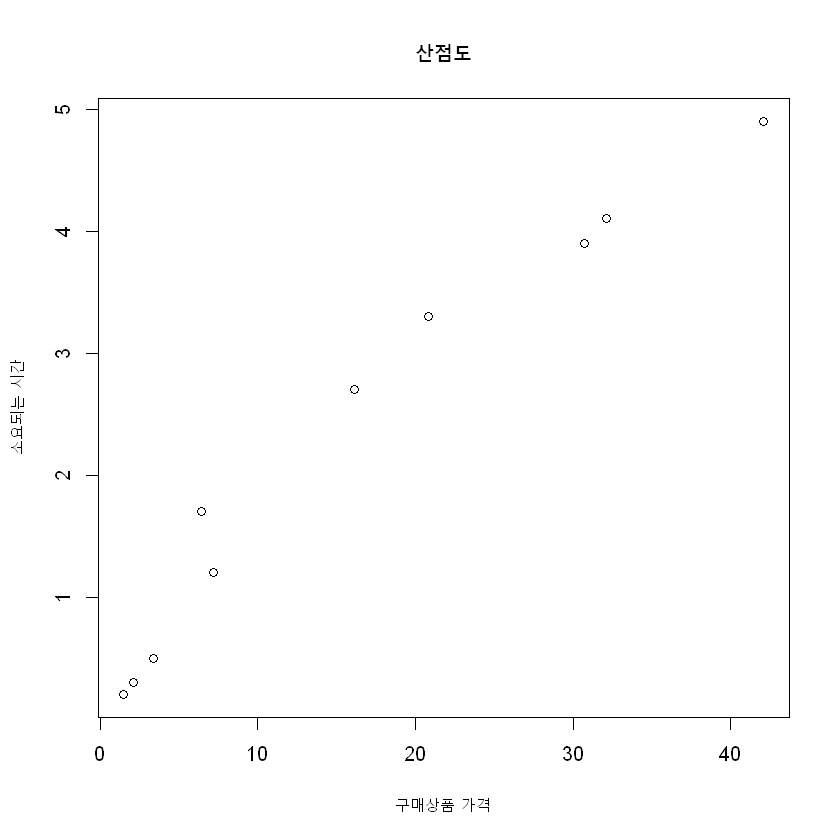

In [4]:
# 데이터
x <- c(6.4, 16.1, 42.1, 2.1, 30.7, 32.1, 7.2, 3.4, 20.8, 1.5)
y <- c(1.7, 2.7, 4.9, 0.3, 3.9, 4.1, 1.2, 0.5, 3.3, 0.2)

plot(x,y, main="산점도", xlab="구매상품 가격", ylab="소요되는 시간")

(b) 단순회귀모형 <img src="https://latex.codecogs.com/svg.image?y=\beta_0&plus;\beta_1\cdot&space;x&plus;u">를 가정하고, 이를 적합시킨 후 <img src="https://latex.codecogs.com/svg.image?R^2"> 값을 구하라. 또한 studentized residual을 세로축, <img src="https://latex.codecogs.com/svg.image?\hat{y}">을 가로축으로 하여 residual plot을 그려라


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.37928 -0.32771 -0.04431  0.32231  0.56126 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.396460   0.191488    2.07   0.0722 .  
x           0.115982   0.008979   12.92 1.22e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3925 on 8 degrees of freedom
Multiple R-squared:  0.9542,	Adjusted R-squared:  0.9485 
F-statistic: 166.9 on 1 and 8 DF,  p-value: 1.221e-06


R^2 value: 0.9542

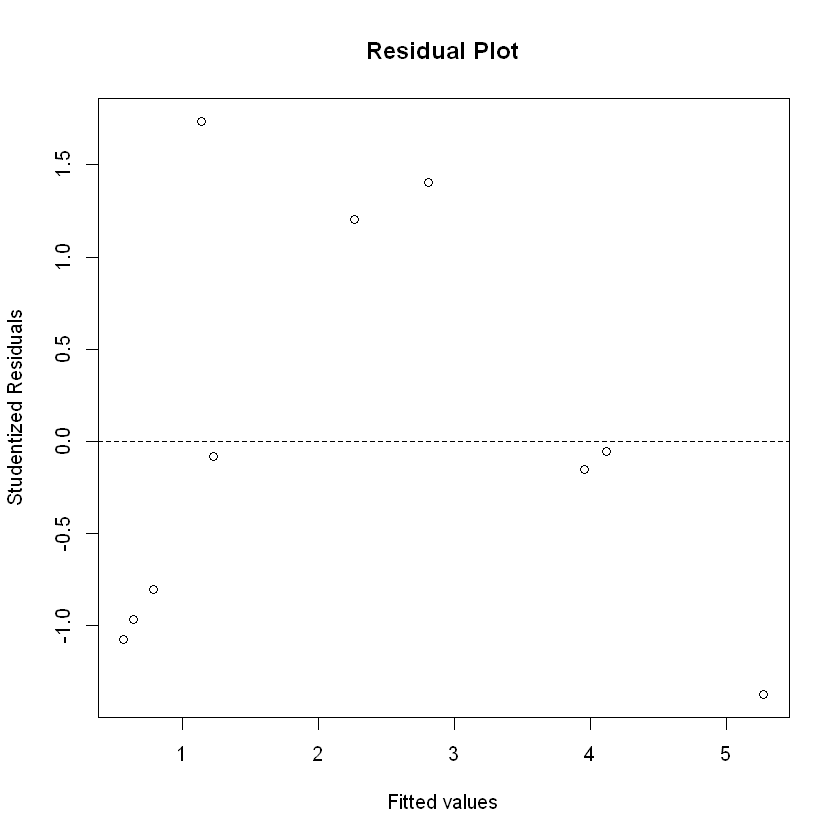

In [8]:
# 단순회귀모형 적합
result <- lm(y ~ x)
summary(result)

# studentized residual 계산
stud_res <- rstudent(result)

# residual plot 그리기
plot(fitted(result), stud_res, main="Residual Plot", xlab="Fitted values", ylab="Studentized Residuals")
abline(h=0, lty=2)  # horizontal line at y=0

cat("R^2 value: 0.9542")

(c) 다음의 모형을 적합시키고 싶다.

  i. <img src="https://latex.codecogs.com/svg.image?y=\beta_0&plus;\beta_1\sqrt{x}&plus;u">

  ii. <img src="https://latex.codecogs.com/svg.image?y=\beta_0\cdot&space;x^{\beta_1}\cdot&space;u">

  iii. <img src="https://latex.codecogs.com/svg.image?e^{y}=\beta_0\cdot&space;x^{\beta_1}\cdot&space;u">

  위의 모형을 적절한 변환을 통해 선형모형으로 만들어(변환이 필요없는 모형은 원래 모형대로) 산점도를 그리고, 회귀직선을 적합시킨 후 각각 <img src="https://latex.codecogs.com/svg.image?R^2">을 구하여라. 어떤 모형이 가장 큰 <img src="https://latex.codecogs.com/svg.image?R^2">값을 가지는가?


Call:
lm(formula = y ~ sqrt(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.25411 -0.10710 -0.01200  0.05712  0.38417 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.96360    0.13656  -7.056 0.000107 ***
sqrt(x)      0.90103    0.03389  26.589  4.3e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1941 on 8 degrees of freedom
Multiple R-squared:  0.9888,	Adjusted R-squared:  0.9874 
F-statistic:   707 on 1 and 8 DF,  p-value: 4.305e-09


R^2 value: 0.9888

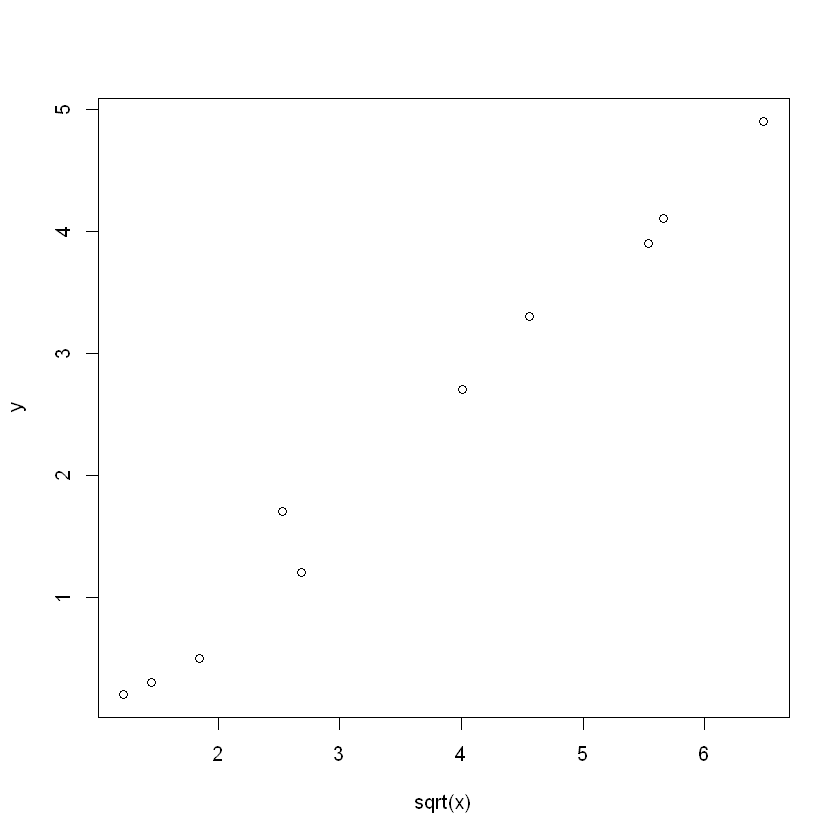

In [12]:
# 첫번째 식
# 첫번째 식은 변환이 필요없다
result1 = lm(y~sqrt(x))
summary(result1)

plot(sqrt(x), y)

cat("R^2 value: 0.9888")


Call:
lm(formula = log(y) ~ log(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.21320 -0.12607 -0.09418  0.08447  0.54444 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.78258    0.16865  -10.57 5.60e-06 ***
log(x)       0.95285    0.06654   14.32 5.52e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2394 on 8 degrees of freedom
Multiple R-squared:  0.9625,	Adjusted R-squared:  0.9578 
F-statistic: 205.1 on 1 and 8 DF,  p-value: 5.52e-07


R^2 value: 0.9625

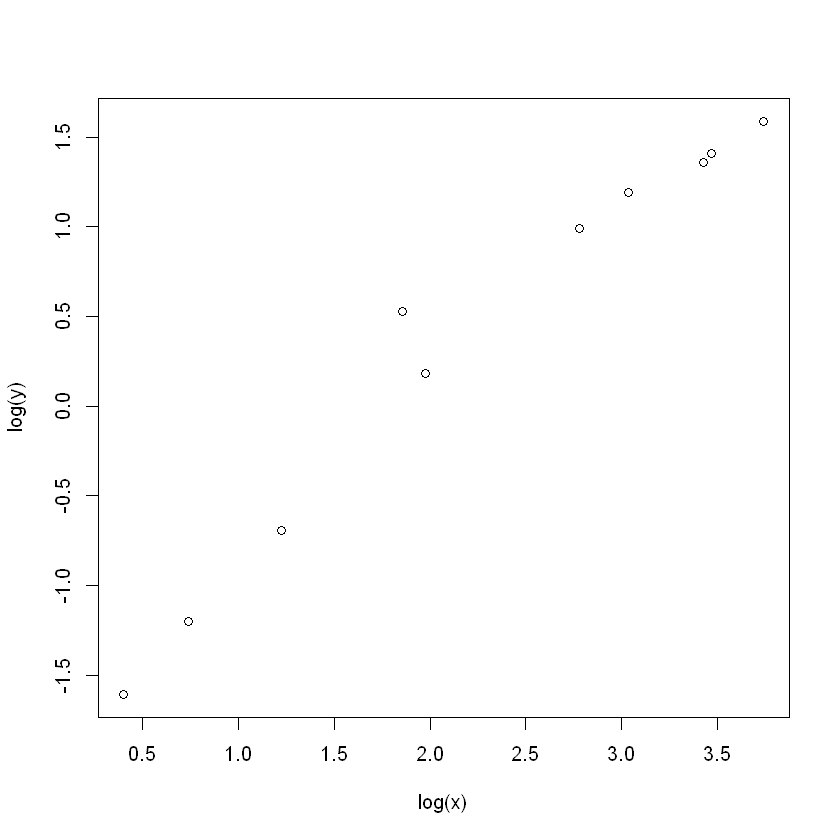

In [16]:
# 두번째 식
# 변환된 식: log(y) = log(beta_0) + beta_1 * log(x) + log(u)
result2 = lm(log(y)~log(x))
summary(result2)

plot(log(x), log(y))

cat("R^2 value: 0.9625")


Call:
lm(formula = y ~ log(x))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67050 -0.24403 -0.00874  0.15468  0.54240 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.9097     0.2809  -3.238   0.0119 *  
log(x)        1.4084     0.1108  12.706 1.38e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3987 on 8 degrees of freedom
Multiple R-squared:  0.9528,	Adjusted R-squared:  0.9469 
F-statistic: 161.4 on 1 and 8 DF,  p-value: 1.385e-06


R^2 value: 0.9528

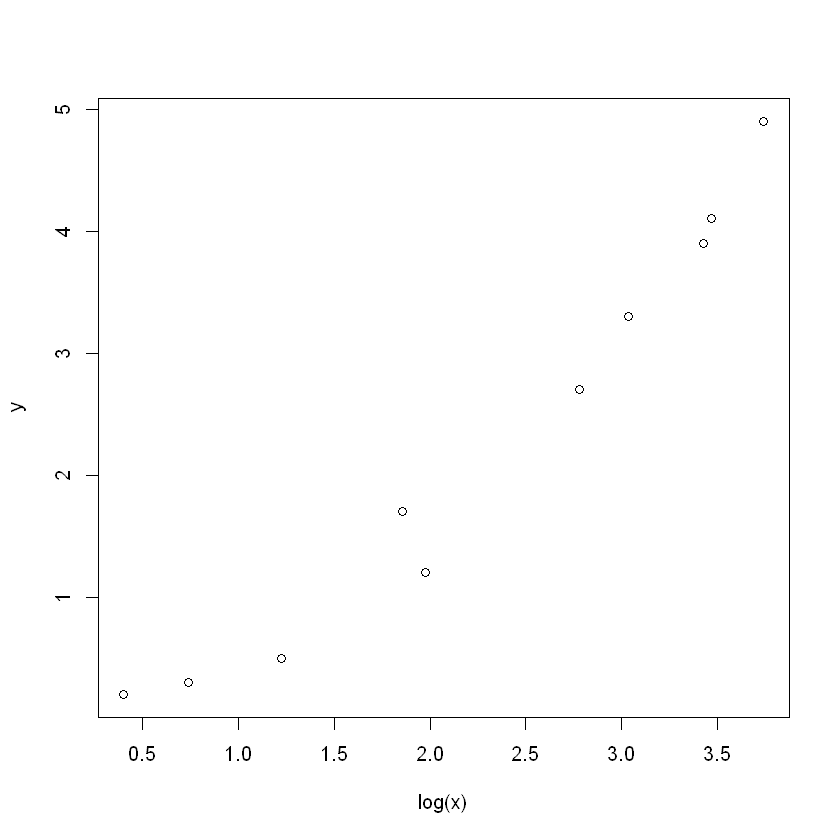

In [19]:
# 세번째 식
# 적합된 식: y = log(beta_0) + beta_1*log(x) + log(u)
result3 = lm(y~log(x))
summary(result3)

plot(log(x), y)

cat("R^2 value: 0.9528")

첫 번째 식이 0.9888로 가장 큰 R^2 값을 가진다.


(d) 위의 (c)에서 가장 큰 R^2 값을 가지는 모형에 대하여, 선형변환된 모형 하에서 (b)와 같이 residual plot을 그려보아라.



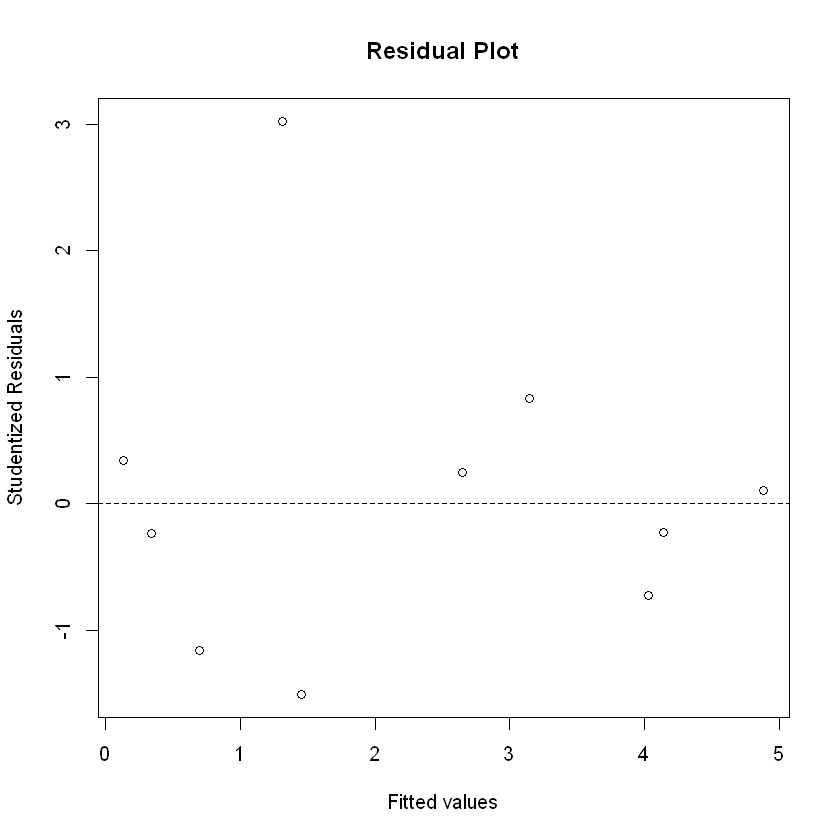

In [20]:
# studentized residual 계산
stud_res1 <- rstudent(result1)

# residual plot 그리기
plot(fitted(result1), stud_res1, main="Residual Plot", xlab="Fitted values", ylab="Studentized Residuals")
abline(h=0, lty=2)  # horizontal line at y=0

(e) 위의 (c)에서 R^2 값이 가장 큰 모형을 선택했을 경우, 구매상품 금액이 10000원일 때 소요되는 시간이 평균 몇 분이라고 예측할 수 있는가?

In [22]:
predict(result1, newdata=data.frame(x=10000))

1 
89.139

약 89.139초이다.